# **The general process for ARIMA Models is the following:**
   * Visualize the time series data
   * Make the time series data stationary
   * Plot the Correlation and AutoCorrelation Charts
   * Construct the ARIMA model
   * Use the model to make predictions

## **Visualize the data**

### **step 1**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("./monthly-milk-production-pounds-p.csv")

In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.columns = ["Month","Milk in Pounds per Cow"]

In [6]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df["Month"] = pd.to_datetime(df["Month"])

In [11]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [12]:
df.set_index("Month",inplace=True)

df.head()

In [13]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


### **step 2**

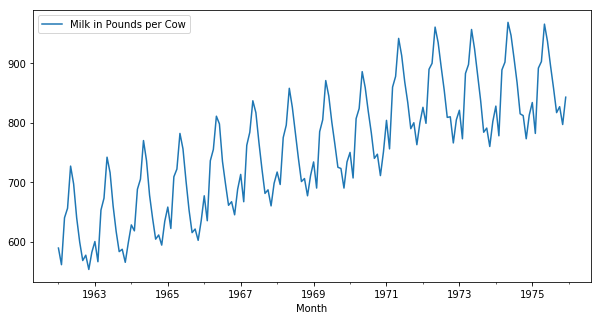

In [15]:
df.plot(figsize=(10,5))

In [16]:
time_series = df["Milk in Pounds per Cow"]

In [17]:
type(time_series)

pandas.core.series.Series

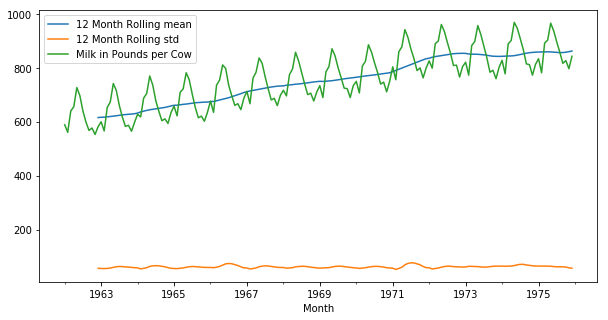

In [18]:
time_series.rolling(12).mean().plot(label="12 Month Rolling mean",figsize=(10,5))
time_series.rolling(12).std().plot(label="12 Month Rolling std")
time_series.plot()
plt.legend()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decomp = seasonal_decompose(time_series)

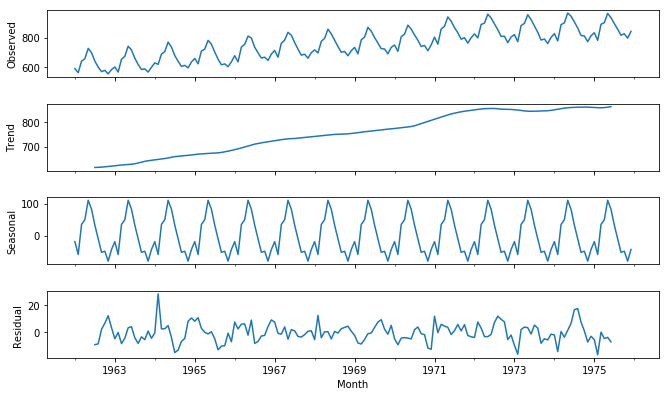

In [21]:
fig = decomp.plot()
fig.set_size_inches(10,6)

## **Make the time series stationary**

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
result = adfuller(df["Milk in Pounds per Cow"])

In [25]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller test")
    labels = ["ADF Test Statistic","p-value","Number of lags","Numb of Obs used"]
    
    for value,label in zip(result,labels):
        print(label + " " + str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has not unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Failed to reject null hypothesis")
        print("Data has unit root and it is none stationary")

In [26]:
adf_check(df["Milk in Pounds per Cow"])

Augmented Dicky-Fuller test
ADF Test Statistic -1.3038115874221246
p-value 0.627426708603034
Number of lags 13
Numb of Obs used 154
Weak evidence against null hypothesis
Failed to reject null hypothesis
Data has unit root and it is none stationary


In [27]:
df["First difference"] = df["Milk in Pounds per Cow"] - df["Milk in Pounds per Cow"].shift(1)

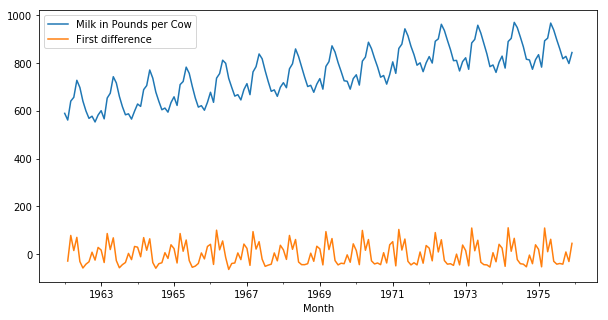

In [33]:
df[["Milk in Pounds per Cow","First difference"]].plot(figsize=(10,5))

In [35]:
adf_check(df["First difference"].dropna())

Augmented Dicky-Fuller test
ADF Test Statistic -3.0549955586530553
p-value 0.03006800400178688
Number of lags 14
Numb of Obs used 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has not unit root and is stationary


In [36]:
df["Milk second difference"] = df["First difference"] -  df["First difference"].shift(1)

In [38]:
adf_check(df["Milk second difference"].dropna())

Augmented Dicky-Fuller test
ADF Test Statistic -14.327873645603336
p-value 1.1126989332083069e-26
Number of lags 11
Numb of Obs used 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has not unit root and is stationary


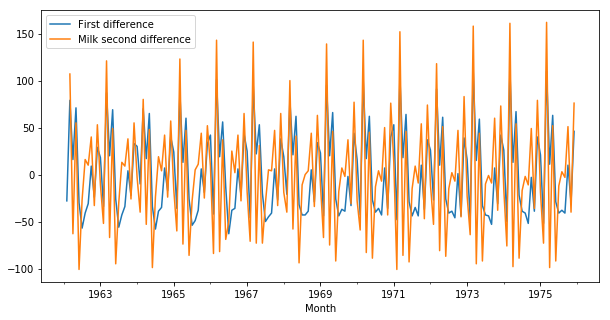

In [41]:
df[["First difference","Milk second difference"]].plot(figsize=(10,5))

In [42]:
df["Seasonal difference"] = df["Milk in Pounds per Cow"] - df["Milk in Pounds per Cow"].shift(12)

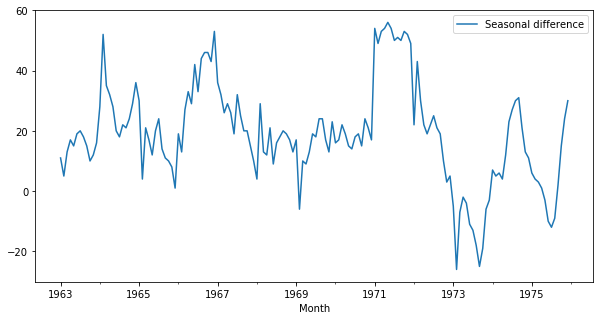

In [45]:
df["Seasonal difference"].plot(figsize=(10,5))
plt.legend()

In [46]:
adf_check(df["Seasonal difference"].dropna())

Augmented Dicky-Fuller test
ADF Test Statistic -2.3354193143593993
p-value 0.16079880527711304
Number of lags 12
Numb of Obs used 143
Weak evidence against null hypothesis
Failed to reject null hypothesis
Data has unit root and it is none stationary


In [47]:
df["Seasonal first difference"] = df["First difference"] - df["First difference"].shift(12)

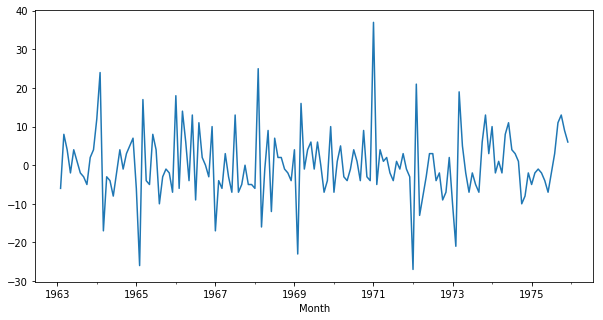

In [48]:
df["Seasonal first difference"].plot(figsize=(10,5))

In [49]:
adf_check(df["Seasonal first difference"].dropna())

Augmented Dicky-Fuller test
ADF Test Statistic -5.038002274921985
p-value 1.86542343187882e-05
Number of lags 11
Numb of Obs used 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has not unit root and is stationary


## Plot the Correlation and AutoCorrelation Charts

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

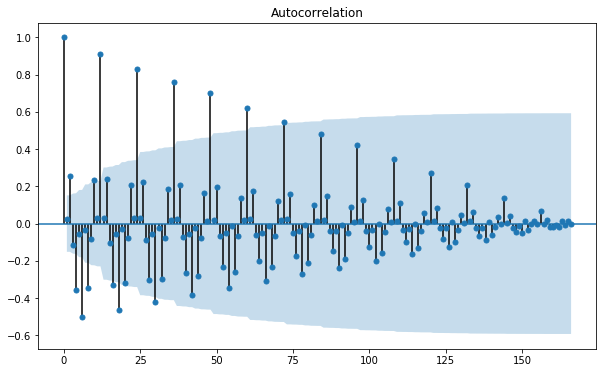

In [54]:
fig_first = plot_acf(df["First difference"].dropna())
fig_first.set_size_inches(10,6)

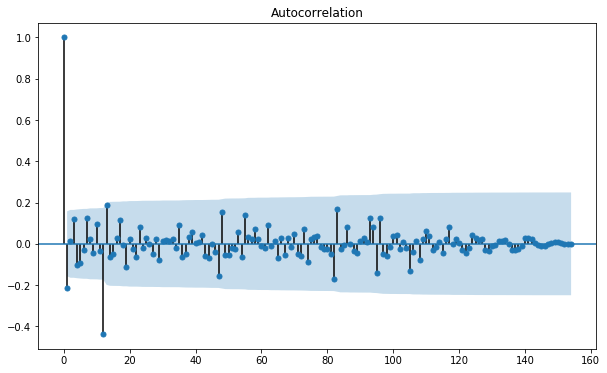

In [56]:
fig_seasonal_first = plot_acf(df["Seasonal first difference"].dropna())
fig_seasonal_first.set_size_inches(10,6)

/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


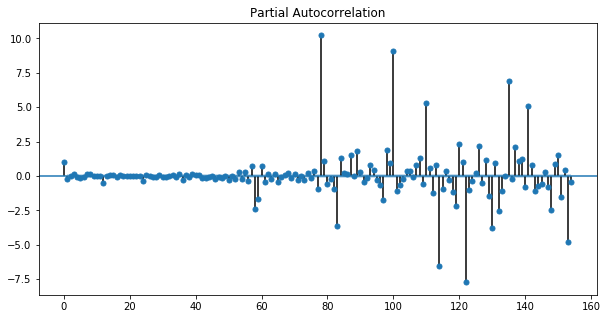

In [59]:
fig_first_pacf = plot_pacf(df["Seasonal first difference"].dropna())
fig_first_pacf.set_size_inches(10,5)

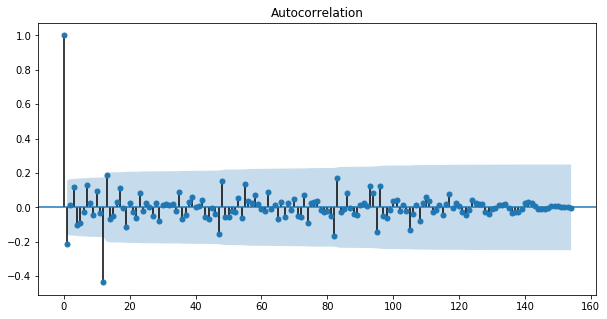

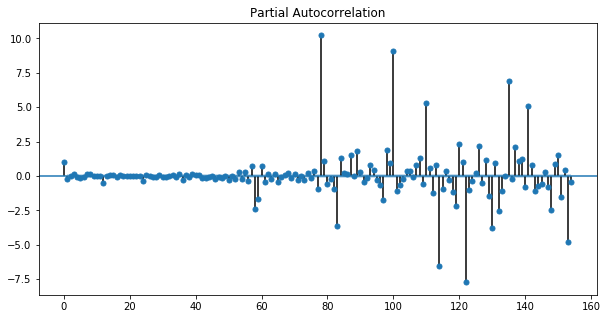

In [62]:
plot_acf(df["Seasonal first difference"].dropna()).set_size_inches(10,5)
plot_pacf(df["Seasonal first difference"].dropna()).set_size_inches(10,5)

## Construct the ARIMA model

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [65]:
model = sm.tsa.statespace.SARIMAX(df["Milk in Pounds per Cow"],order=(0,1,0),seasonal_order=(1,1,1,12))

/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [66]:
results = model.fit()

In [68]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Tue, 11 Dec 2018   AIC                           1074.131
Time:                                    14:55:01   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

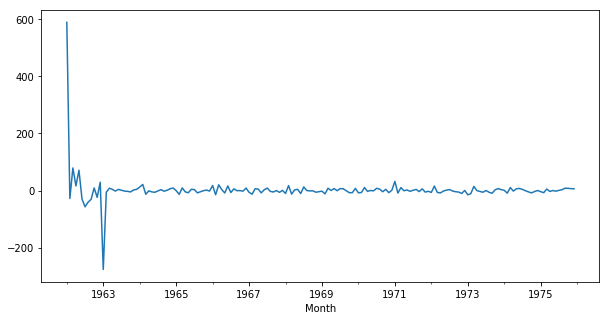

In [71]:
results.resid.plot(figsize=(10,5))

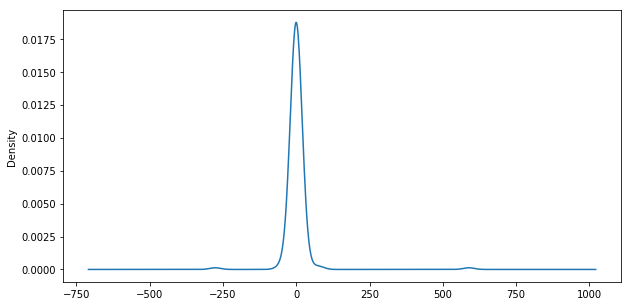

In [72]:
results.resid.plot(kind="kde",figsize=(10,5))

## Use the model to make predictions

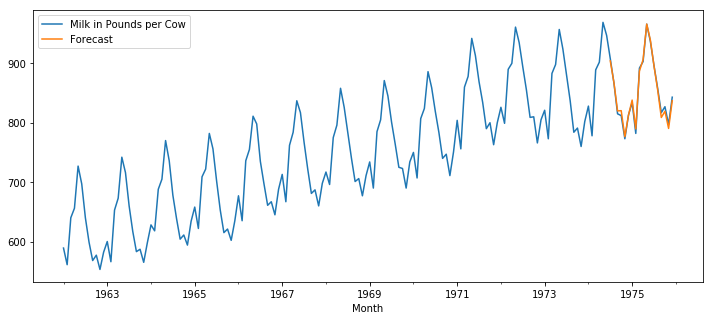

In [75]:
df["Forecast"] = results.predict(start = 150,end = 168)
df[["Milk in Pounds per Cow","Forecast"]].plot(figsize=(12,5))

In [76]:
df.tail()

,Milk in Pounds per Cow,First difference,Milk second difference,Seasonal difference,Seasonal first difference,Forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [78]:
from pandas.tseries.offsets import DateOffset

In [81]:
futures_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [82]:
futures_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [83]:
futures_df = pd.DataFrame(index=futures_dates,columns=df.columns)

In [85]:
futures_df.head()

,Milk in Pounds per Cow,First difference,Milk second difference,Seasonal difference,Seasonal first difference,Forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
final_df = pd.concat([df,futures_df])

In [88]:
final_df.tail()

,Milk in Pounds per Cow,First difference,Milk second difference,Seasonal difference,Seasonal first difference,Forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
final_df["Forecast"] = results.predict(start=168,end=192)

In [90]:
final_df.tail()

,Milk in Pounds per Cow,First difference,Milk second difference,Seasonal difference,Seasonal first difference,Forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962996


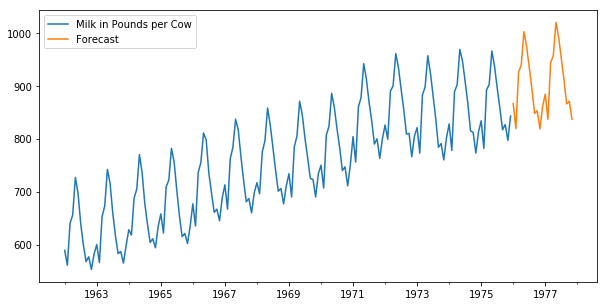

In [92]:
final_df[["Milk in Pounds per Cow","Forecast"]].plot(figsize=(10,5))